In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style = 'darkgrid')

In [3]:
df = pd.read_csv(r"F:\Krishna\Excel R\Data Scientist\Assignments\Recommendation System\anime.csv")
df

anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64   
2      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
3                                       Sci-Fi, Thriller     TV       24   
4      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
...                                                  ...    ...      ...   
12289                                             Hentai    OVA        1   
12290                                             Hentai    OVA        1   
12291                                             Hentai    OVA        4   
12292                                             Hentai    OVA        1   
12293                                             Hentai  Movie        1   

       rating  members  
0        9.37   200630  
1        9.26   793665  
2        9.25   114262  
3        9.17   673572  
4        9.16   151266  
...       ...      ...  
12289    4.15      211  
12290    4.28      183  
12291    4.88      219  
12292    4.98      175  
12293    5.46      142  

[12294 rows x 7 columns]

In [4]:
df['name'].value_counts()

Shi Wan Ge Leng Xiaohua                           2
Saru Kani Gassen                                  2
Bakabon Osomatsu no Karee wo Tazunete Sansenri    1
Backkom Meogeujan Yeohaeng                        1
Backkom Mission Impossible                        1
                                                 ..
Yoroiden Samurai Troopers Kikoutei Densetsu       1
Yuu☆Yuu☆Hakusho: Mu Mu Hakusho                    1
3-gatsu no Lion meets Bump of Chicken             1
Bannou Bunka Neko-Musume                          1
Yasuji no Pornorama: Yacchimae!!                  1
Name: name, Length: 12292, dtype: int64

In [5]:
df['name'].nunique()

12292

In [6]:
df['genre'].value_counts()

Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: genre, Length: 3264, dtype: int64

In [7]:
df['genre'].nunique()

3264

In [8]:
df['type'].value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

In [9]:
df['type'].nunique()

6

<Axes: xlabel='count', ylabel='type'>

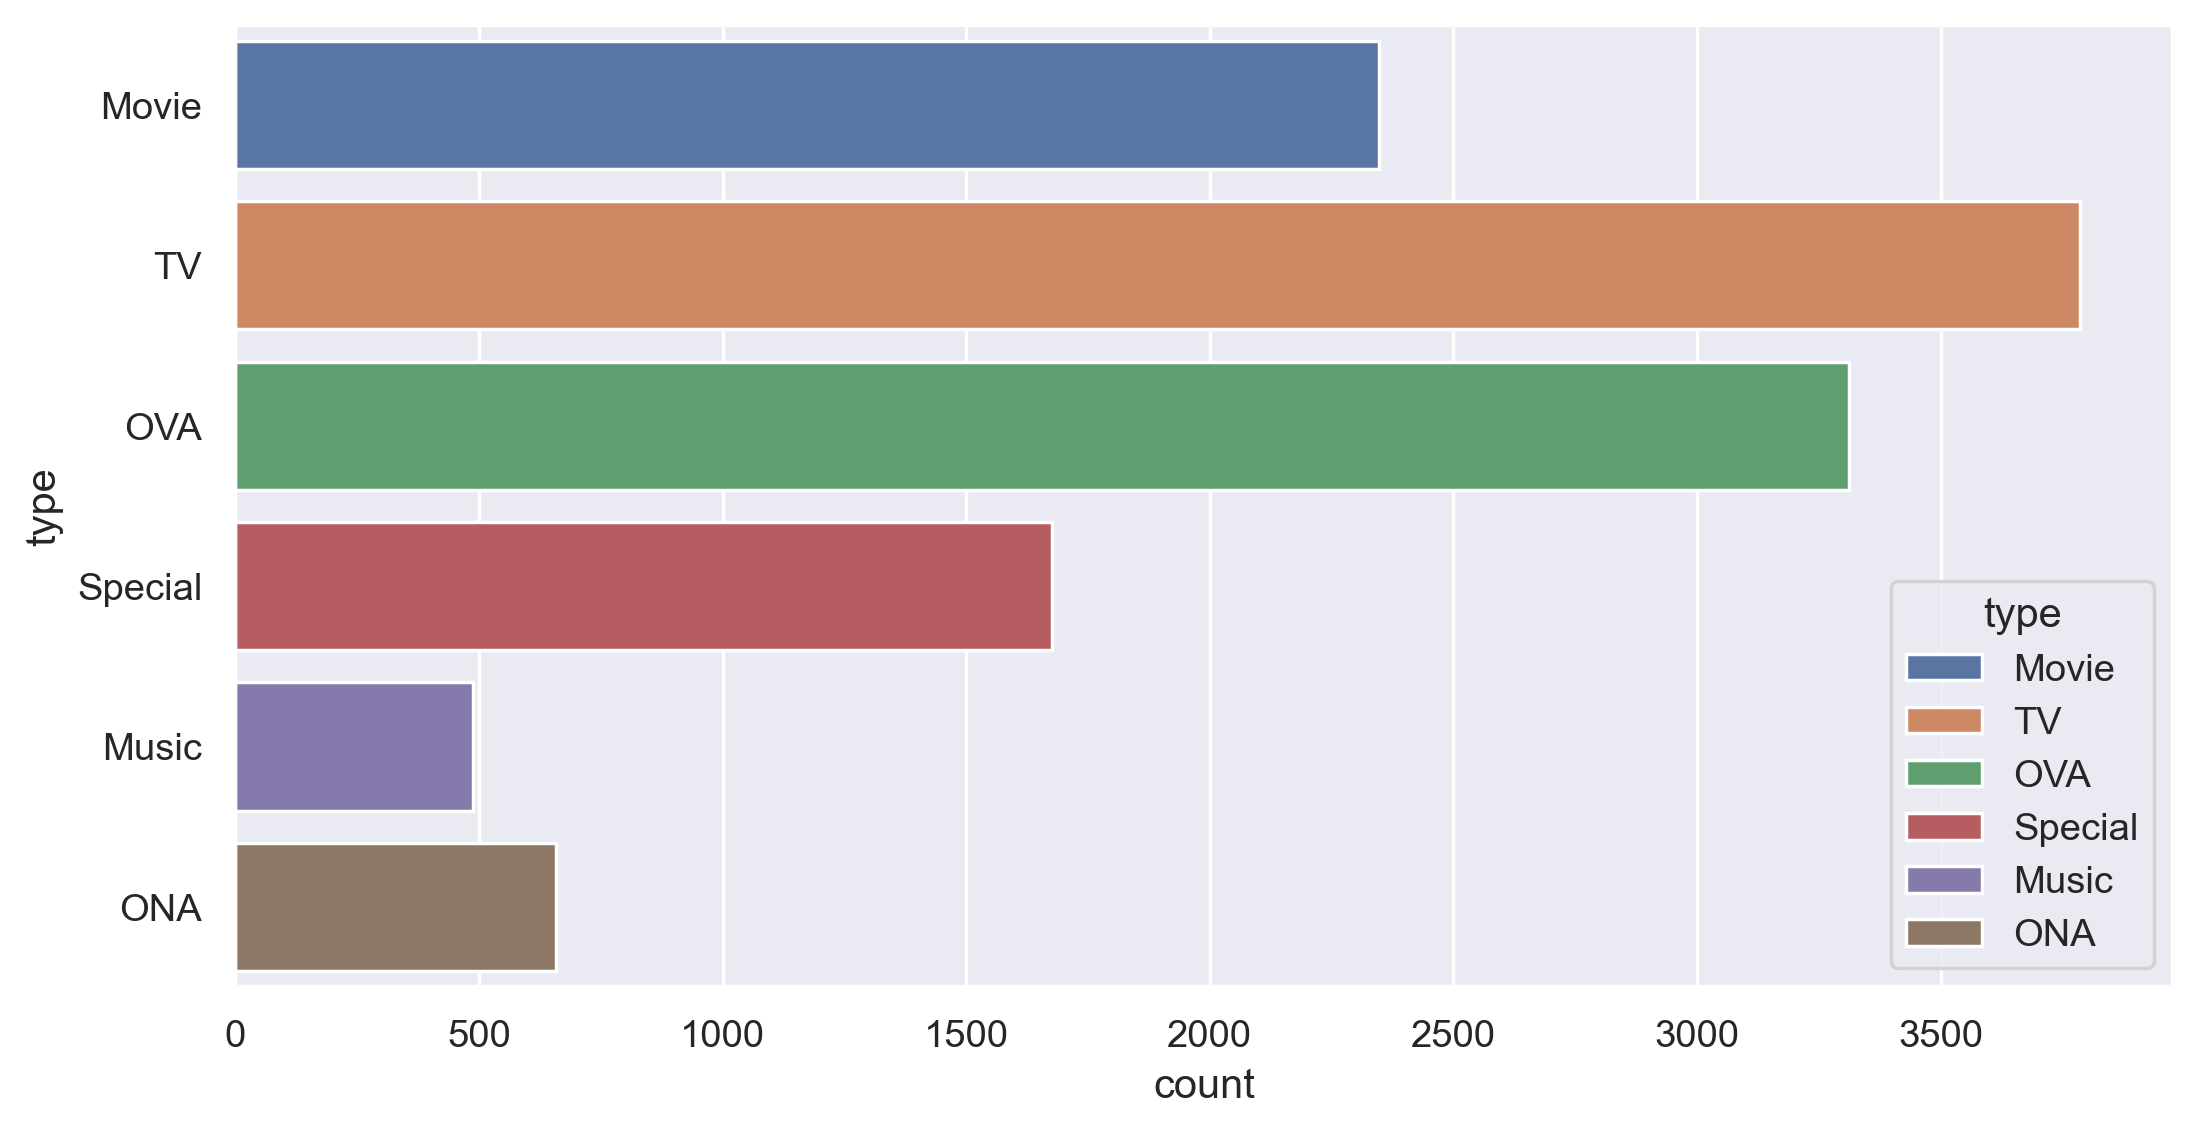

In [10]:
sns.countplot(y = df['type'], hue = df['type'])

(array([   6.,   49.,  275.,  733., 1824., 3654., 3822., 1467.,  225.,
           9.]),
 array([ 1.67 ,  2.503,  3.336,  4.169,  5.002,  5.835,  6.668,  7.501,
         8.334,  9.167, 10.   ]),
 <BarContainer object of 10 artists>)

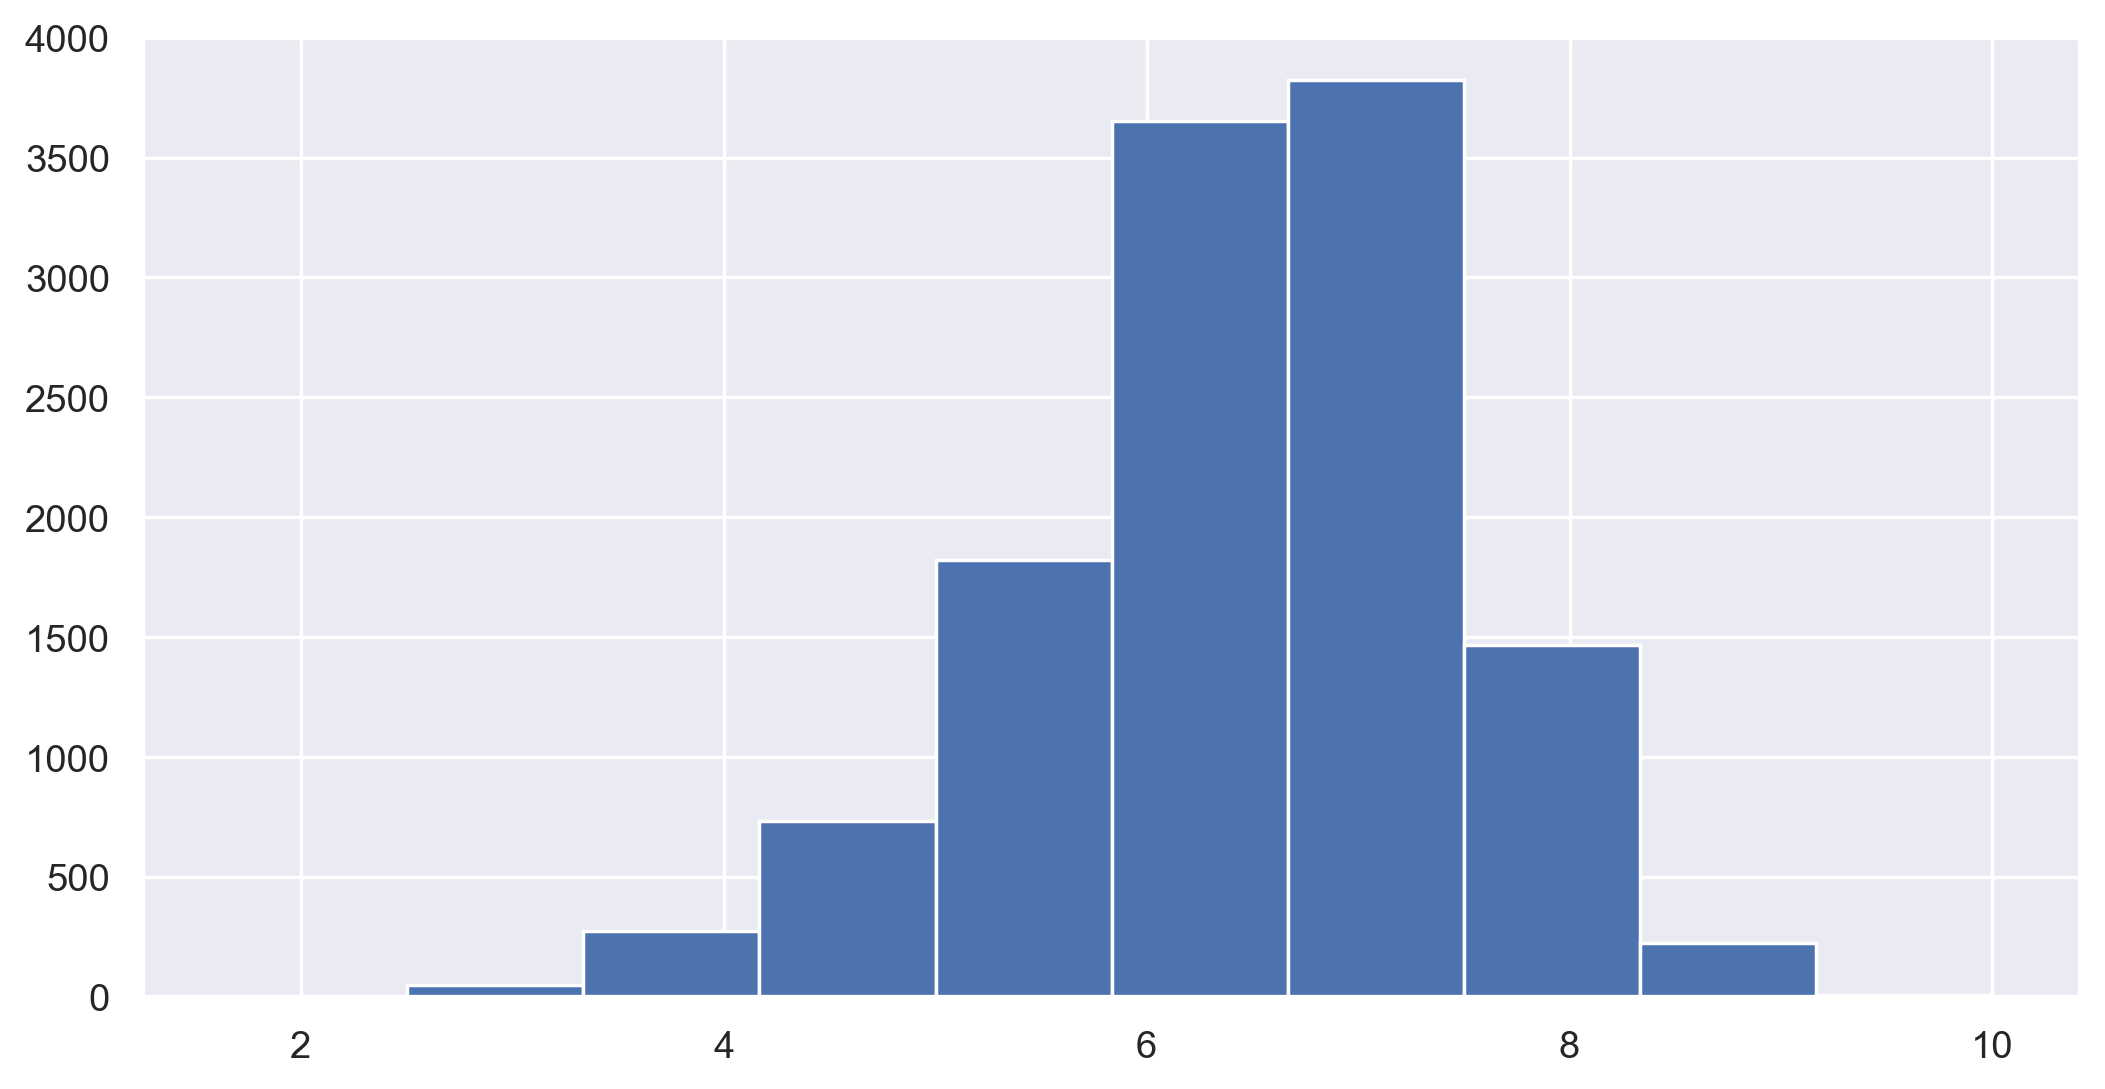

In [11]:
plt.hist(x = df['rating'])

Choosing anime_id as Rows and genre of them as columns. Also here I have chosen Rating as values, so that we can compare genre wise that how many animes have similar genre and ratings. So, once we get pairs of animes similar to each other based on genre and ratings , we can suggest them to related members.

In [13]:
pivot = pd.pivot(data = df, index = 'anime_id', columns = 'genre', values = 'rating')
pivot

genre     NaN  Action  Action, Adventure  \
anime_id                                   
1         NaN     NaN                NaN   
5         NaN     NaN                NaN   
6         NaN     NaN                NaN   
7         NaN     NaN                NaN   
8         NaN     NaN                NaN   
...       ...     ...                ...   
34514     NaN     NaN                NaN   
34519     NaN     NaN                NaN   
34522     NaN     NaN                NaN   
34525     NaN     NaN                NaN   
34527     NaN     NaN                NaN   

genre     Action, Adventure, Cars, Comedy, Sci-Fi, Shounen  \
anime_id                                                     
1                                                      NaN   
5                                                      NaN   
6                                                      NaN   
7                                                      NaN   
8                                                      NaN   
...                                                    ...   
34514                                                  NaN   
34519                                                  NaN   
34522                                                  NaN   
34525                                                  NaN   
34527                                                  NaN   

genre     Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports  \
anime_id                                                            
1                                                       NaN         
5                                                       NaN         
6                                                       NaN         
7                                                       NaN         
8                                                       NaN         
...                                                     ...         
34514                                                   NaN         
34519                                                   NaN         
34522                                                   NaN         
34525                                                   NaN         
34527                                                   NaN         

genre     Action, Adventure, Cars, Sci-Fi  Action, Adventure, Comedy  \
anime_id                                                               
1                                     NaN                        NaN   
5                                     NaN                        NaN   
6                                     NaN                        NaN   
7                                     NaN                        NaN   
8                                     NaN                        NaN   
...                                   ...                        ...   
34514                                 NaN                        NaN   
34519                                 NaN                        NaN   
34522                                 NaN                        NaN   
34525                                 NaN                        NaN   
34527                                 NaN                        NaN   

genre     Action, Adventure, Comedy, Demons, Drama, Ecchi, Horror, Mystery, Romance, Sci-Fi  \
anime_id                                                                                      
1                                                       NaN                                   
5                                                       NaN                                   
6                                                       NaN                                   
7                                                       NaN                                   
8                                                       NaN                                   
...                                                     ...                                   
34514                    

In [14]:
pivot.fillna(0, inplace = True)

In [15]:
pivot

genre     NaN  Action  Action, Adventure  \
anime_id                                   
1         0.0     0.0                0.0   
5         0.0     0.0                0.0   
6         0.0     0.0                0.0   
7         0.0     0.0                0.0   
8         0.0     0.0                0.0   
...       ...     ...                ...   
34514     0.0     0.0                0.0   
34519     0.0     0.0                0.0   
34522     0.0     0.0                0.0   
34525     0.0     0.0                0.0   
34527     0.0     0.0                0.0   

genre     Action, Adventure, Cars, Comedy, Sci-Fi, Shounen  \
anime_id                                                     
1                                                      0.0   
5                                                      0.0   
6                                                      0.0   
7                                                      0.0   
8                                                      0.0   
...                                                    ...   
34514                                                  0.0   
34519                                                  0.0   
34522                                                  0.0   
34525                                                  0.0   
34527                                                  0.0   

genre     Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports  \
anime_id                                                            
1                                                       0.0         
5                                                       0.0         
6                                                       0.0         
7                                                       0.0         
8                                                       0.0         
...                                                     ...         
34514                                                   0.0         
34519                                                   0.0         
34522                                                   0.0         
34525                                                   0.0         
34527                                                   0.0         

genre     Action, Adventure, Cars, Sci-Fi  Action, Adventure, Comedy  \
anime_id                                                               
1                                     0.0                        0.0   
5                                     0.0                        0.0   
6                                     0.0                        0.0   
7                                     0.0                        0.0   
8                                     0.0                        0.0   
...                                   ...                        ...   
34514                                 0.0                        0.0   
34519                                 0.0                        0.0   
34522                                 0.0                        0.0   
34525                                 0.0                        0.0   
34527                                 0.0                        0.0   

genre     Action, Adventure, Comedy, Demons, Drama, Ecchi, Horror, Mystery, Romance, Sci-Fi  \
anime_id                                                                                      
1                                                       0.0                                   
5                                                       0.0                                   
6                                                       0.0                                   
7                                                       0.0                                   
8                                                       0.0                                   
...                                                     ...                                   
34514                    

In [16]:
pivot.isna().sum()

genre
NaN                                                        0
Action                                                     0
Action, Adventure                                          0
Action, Adventure, Cars, Comedy, Sci-Fi, Shounen           0
Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports    0
                                                          ..
Super Power, Supernatural, Vampire                         0
Supernatural                                               0
Thriller                                                   0
Vampire                                                    0
Yaoi                                                       0
Length: 3265, dtype: int64

In [17]:
#finding similarities
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
cosine_similarity(pivot)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
pd.DataFrame(cosine_similarity(pivot))

0      1      2      3      4      5      6      7      8      9      \
0        1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12289    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12290    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12291    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12292    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12293    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  12284  12285  12286  12287  12288  12289  12290  12291  12292  \
0      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12289  ...    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0   
12290  ...    0.0    0.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0   
12291  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12292  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12293  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       12293  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
12289    0.0  
12290    0.0  
12291    0.0  
12292    0.0  
12293    0.0  

[12294 rows x 12294 columns]

In [20]:
sim = cosine_similarity(pivot)
sim 

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
np.fill_diagonal(sim, 0)    #converting diagonal line from 1 to 0 bcz that's the similarity of every row with itself

In [22]:
sim

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
similarity = pd.DataFrame(sim)
similarity

0      1      2      3      4      5      6      7      8      9      \
0        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12289    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12290    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12291    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12292    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12293    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  12284  12285  12286  12287  12288  12289  12290  12291  12292  \
0      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
12289  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12290  ...    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
12291  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12292  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12293  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       12293  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
...      ...  
12289    0.0  
12290    0.0  
12291    0.0  
12292    0.0  
12293    0.0  

[12294 rows x 12294 columns]

In [24]:
similarity.index = df['anime_id'].unique() 

In [25]:
similarity.columns = df['anime_id'].unique() 

In [26]:
similarity

32281  5114   28977  9253   9969   32935  11061  820    15335  15417  \
32281    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5114     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28977    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9253     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9969     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9316     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5543     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5621     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6133     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
26081    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  26031  34399  10368  9352   5541   9316   5543   5621   6133   \
32281  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5114   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28977  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9253   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9969   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9316   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5543   ...    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0   
5621   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6133   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
26081  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       26081  
32281    0.0  
5114     0.0  
28977    0.0  
9253     0.0  
9969     0.0  
...      ...  
9316     0.0  
5543     0.0  
5621     0.0  
6133     0.0  
26081    0.0  

[12294 rows x 12294 columns]

In [27]:
pd.set_option('display.max_columns', None)      #to see all the columns without skipping any column

In [28]:
similarity

32281  5114   28977  9253   9969   32935  11061  820    15335  15417  \
32281    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5114     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28977    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9253     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9969     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9316     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5543     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5621     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6133     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
26081    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       4181   28851  918    2904   28891  199    23273  24701  12355  1575   \
32281    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5114     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28977    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9253     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9969     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9316     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5543     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5621     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6133     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
26081    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       263    44     1      30276  164    7311   17074  21939  457    2001   \
32281    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5114     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28977    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9253     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9969     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9316     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5543     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5621     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6133     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
26081    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       245    32983  5258   28957  11665  431    11741  31757  19     12365  \
32281    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5114     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28977    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9253     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
9969     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9316     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5543     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5621     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6133     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
26081    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       1535   32366  30654  20583  19647  4282   10379  22135  21329  31043  \
32281    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5114     0.0    0.0    0.0    0.0    0.0    0.0    0.

In [29]:
similarity.idxmax()

32281     8800
5114     32281
28977      868
9253     32281
9969     12413
         ...  
9316     32281
5543     33032
5621     32281
6133     32281
26081    32281
Length: 12294, dtype: int64

So, here we have pairs of animes having similarities between them. Now, we can take one by one pairs and can see their avg ratings and members and like wise we can suggest one or another movies to remaining members. So, let's try it...

In [35]:
df[(df['anime_id'] == 32281) | (df['anime_id'] == 8800)]

anime_id                           name  \
0        32281                 Kimi no Na wa.   
3456      8800  Senkou no Night Raid Specials   

                                          genre     type episodes  rating  \
0          Drama, Romance, School, Supernatural    Movie        1    9.37   
3456  Action, Historical, Military, Super Power  Special        3    6.99   

      members  
0      200630  
3456     3667

As we can see, both of the above animes are similar to each other. 'Kimi no na wa' have been watched by 200630 this many members. and 'Senkou no Night Raid Specials' have been watched by 3667 members only, hence we can suggest 'Senkou no Night Raid Specials' to all the members watched 'Kimi no na wa' and can say they would definitely like it.

In [36]:
df[(df['anime_id'] == 5114) | (df['anime_id'] == 32281)]

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   

   members  
0   200630  
1   793665

As we can see, both of the above animes are similar to each other. 'Kimi no na wa' have been watched by 200630 this many members. and 'Fullmetal Alchemist: Brotherhood' have been watched by 793665 members only, hence we can suggest 'Kimi no Na wa.' to all the members watched 'Fullmetal Alchemist: Brotherhood	' and can say they would definitely like it.

Interview Questions

1. Can you explain the difference between user-based and item-based collaborative filtering?

-  User-based collaborative filtering :    
Recommends items based on users with similar tastes. This technique creates a group of similar users based on the interactions of a reference user, and then suggests items that are popular in that group but new to the target user
-  Item-based collaborative filtering    
Recommends items based on their similarity to items that a user has already shown interest in. This technique calculates the similarity between items based on how users have rated them, and then recommends items that are similar to ones the user has already consumed or rated. 


2. What is collaborative filtering, and how does it work?

Collaborative filtering is a recommender system that suggests items to users based on how other users with similar tastes have interacted with those items. It's based on the idea that people with similar tastes are likely to agree on their evaluation of certain items. 

Here's how collaborative filtering works:
1. Collect user preferences
Users rate items, such as books, movies, or music, to express their preferences.
2. Find similar users
The system compares a user's ratings to other users' ratings to find people with similar tastes.
3. Make recommendations
The system suggests items that similar users have rated highly but that the current user hasn't rated yet.
